# Gradient Descent
https://youtu.be/4PHI11lX11I
In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows  : y = mx +c
This is the equation for a line that we studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.

## Loss Function
The loss is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c.
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:
- Find the difference between the actual y and predicted y value(y = mx + c), for a given x.
- Square this difference.
- Find the mean of the squares for every value in X.

## GD working

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.

Applying gradient descent to m and c and approach it step by step:

Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.
Now we update the current value of m and c 
We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values
m can be considered the current position of the person. D is equivalent to the steepness of the slope and L can be the speed with which he moves. Now the new value of m that we calculate using the above equation will be his next position, and L×D will be the size of the steps he will take. When the slope is more steep (D is more) he takes longer steps and when it is less steep (D is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.
Now with the optimum value of m and c our model is ready to make predictions !

In [7]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 4.0)

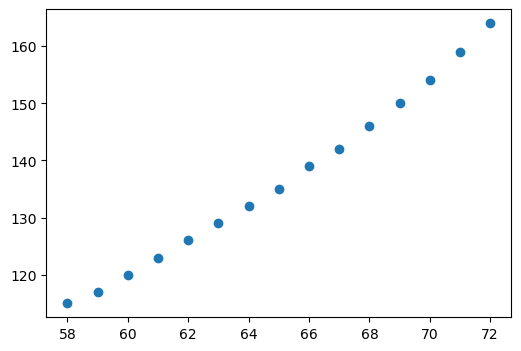

In [8]:
# Preprocessing Input data
dataLink = 'https://raw.githubusercontent.com/DUanalytics/datasets/master/csv/women1.csv'
data = pd.read_csv(dataLink)
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [31]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

2.1101949562070046 -0.04466494140099339


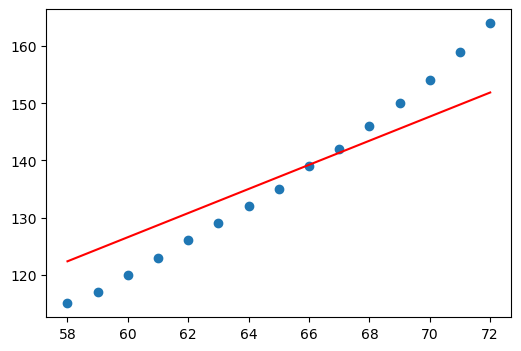

In [10]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show();

In [50]:
# using LR sklearn
from sklearn.linear_model import LinearRegression as lm
np.set_printoptions(precision=2, suppress=True)

In [18]:
X1 = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y1 = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
print(np.hstack([X1, Y1]))

[[ 58 115]
 [ 59 117]
 [ 60 120]
 [ 61 123]
 [ 62 126]
 [ 63 129]
 [ 64 132]
 [ 65 135]
 [ 66 139]
 [ 67 142]
 [ 68 146]
 [ 69 150]
 [ 70 154]
 [ 71 159]
 [ 72 164]]


In [27]:
lm1 = lm()  # create object for the class
lm1.fit(X1, Y1)  # perform linear regression
Y1_pred = lm1.predict(X1)  # make predictions
print(np.hstack([X1, Y1, Y1_pred]))

[[ 58.         115.         112.58333333]
 [ 59.         117.         116.03333333]
 [ 60.         120.         119.48333333]
 [ 61.         123.         122.93333333]
 [ 62.         126.         126.38333333]
 [ 63.         129.         129.83333333]
 [ 64.         132.         133.28333333]
 [ 65.         135.         136.73333333]
 [ 66.         139.         140.18333333]
 [ 67.         142.         143.63333333]
 [ 68.         146.         147.08333333]
 [ 69.         150.         150.53333333]
 [ 70.         154.         153.98333333]
 [ 71.         159.         157.43333333]
 [ 72.         164.         160.88333333]]


In [30]:
print('Coef ', lm1.coef_, ' Intercept ', lm1.intercept_)

Coef  [[3.45]]  Intercept  [-87.51666667]


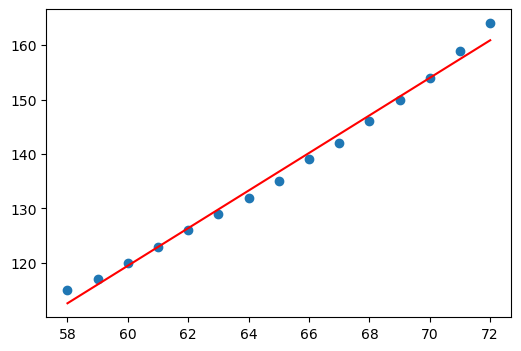

In [21]:
plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, color='red')
plt.show();

In [55]:
gd_diff = Y - Y_pred
lr_diff = Y.values.reshape(-1, 1) - Y1_pred
#print(lr_diff)
print(np.hstack([X.to_numpy().reshape(-1, 1),Y.values.reshape(-1, 1), Y_pred.values.reshape(-1, 1), Y1_pred, gd_diff.values.reshape(-1, 1),lr_diff]))
# X : Y : Ypred(GD) : Ypred(LR) :  Diff(Y-YpredGD) : Diff(Y - YpredLR)
print(sum(gd_diff**2), sum(lr_diff**2))

[[ 58.   115.   122.35 112.58  -7.35   2.42]
 [ 59.   117.   124.46 116.03  -7.46   0.97]
 [ 60.   120.   126.57 119.48  -6.57   0.52]
 [ 61.   123.   128.68 122.93  -5.68   0.07]
 [ 62.   126.   130.79 126.38  -4.79  -0.38]
 [ 63.   129.   132.9  129.83  -3.9   -0.83]
 [ 64.   132.   135.01 133.28  -3.01  -1.28]
 [ 65.   135.   137.12 136.73  -2.12  -1.73]
 [ 66.   139.   139.23 140.18  -0.23  -1.18]
 [ 67.   142.   141.34 143.63   0.66  -1.63]
 [ 68.   146.   143.45 147.08   2.55  -1.08]
 [ 69.   150.   145.56 150.53   4.44  -0.53]
 [ 70.   154.   147.67 153.98   6.33   0.02]
 [ 71.   159.   149.78 157.43   9.22   1.57]
 [ 72.   164.   151.89 160.88  12.11   3.12]]
535.0755467857946 [30.23]


In [ ]:
## GD using package

In [4]:
#pip install gradient-descent

### End of Topic
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
Gradient descent is one of the simplest and widely used algorithms in machine learning, mainly because it can be applied to any function to optimize it. Learning it lays the foundation to mastering machine learning.
https://realpython.com/gradient-descent-algorithm-python